 # Homework 2

## Data Loading and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data=pd.read_csv(r"Z:\TAIWO\Downloads\laptops.csv")

data.columns=data.columns.str.lower().str.replace(' ', '_')

In [2]:
data.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
#selecting the following columns

data_n=data[['ram','storage','screen','final_price']]
data_n.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


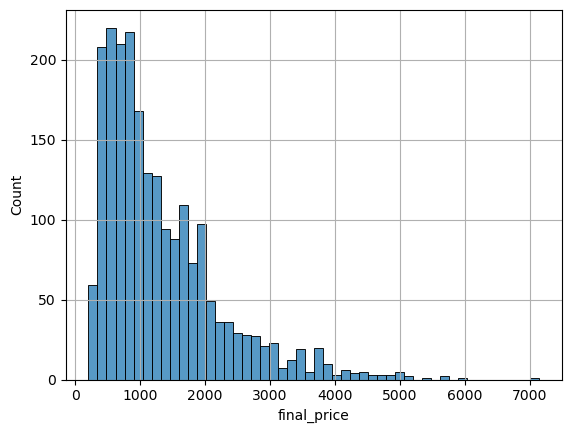

In [4]:
sns.histplot(data_n['final_price'], bins=50)
plt.grid()

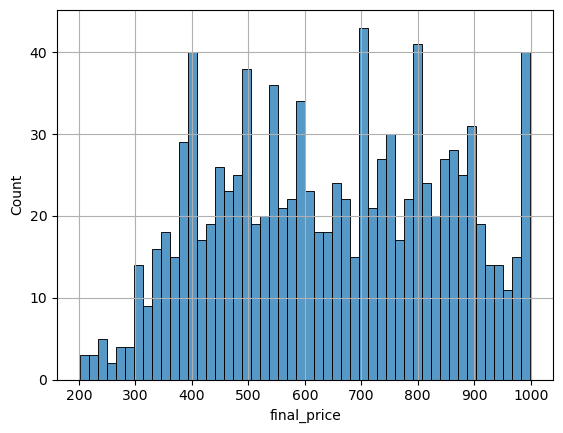

In [5]:
sns.histplot(data_n.final_price[data_n.final_price<1000], bins=50)
plt.grid()

* the data does not have long tail distribution

## Question1

In [6]:
#missing values
data_n.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

## Question2

In [7]:
#medain value for RAM
median_RAM=data_n['ram'].median()
median_RAM

16.0

## Question3

In [8]:
np.random.seed(42)

n = len(data_n)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
n_val, n_test, n_train

(432, 432, 1296)

In [9]:
idx = np.arange(n)
np.random.shuffle(idx)

data_n_shuffled = data_n.iloc[idx]

df_train = data_n_shuffled.iloc[:n_train].copy().reset_index(drop=True)
df_val = data_n_shuffled.iloc[n_train:n_train+n_val].copy().reset_index(drop=True)
df_test = data_n_shuffled.iloc[n_train+n_val:].copy().reset_index(drop=True)

In [10]:
#getting final data for training
y_train=df_train['final_price'].values
y_test=df_test['final_price'].values
y_val=df_val['final_price'].values

In [11]:
y_train

array([1123.29,  201.05,  997.74, ..., 1059.  , 1671.  , 1056.  ])

In [12]:
## Linear regression

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [13]:

base = ['ram', 'storage', 'screen']

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [14]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
y_pred 

array([2377.35987681,  398.02076576, 2435.12627415, ..., 1255.89731808,
       1313.66371541, 1313.66371541])

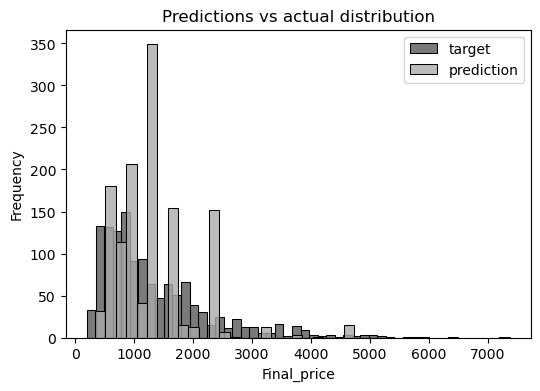

In [15]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Final_price')
plt.title('Predictions vs actual distribution')

plt.show()

In [16]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [17]:
rmse(y_train, y_pred)

602.3920520606714

In [18]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [19]:
rmse(y_val, y_pred)

597.3635593619621

In [20]:
#fill with mean
mean=df_train['screen'].mean()
base = ['ram', 'storage', 'screen']

def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(mean)
    X = df_num.values
    return X



In [21]:
X_train_mean = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w_0 + X_train_mean.dot(w)
y_pred_mean

array([2380.46558232,  403.23698821, 2452.75795532, ..., 1252.72169651,
       1325.01406951, 1325.01406951])

In [22]:
#print rmse of model trained with filled mean
rmse(y_train, y_pred_mean)

602.1844959403247

In [23]:
#validating mean model 
X_val_mean = prepare_X_mean(df_val)
y_pred_mean = w_0 + X_val_mean.dot(w)
rmse(y_val, y_pred_mean)

600.2650313748422

## Question 4

In [24]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [38]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [39]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    score=rmse(y_val, y_pred)
    print('%5s, %.2f, %.2f' %(r, w_0, score ))

    0, 676.90, 597.36
 0.01, 676.27, 597.36
  0.1, 670.73, 597.35
    1, 619.90, 597.21
    5, 463.78, 597.01
   10, 352.80, 597.06
  100, 66.92, 597.90


## Question 5

In [54]:
seeds=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rootmeansquare=[]
std=[]
for i in seeds:
    np.random.seed(i)
    n = len(data_n)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    n_val, n_test, n_train
    idx = np.arange(n)
    np.random.shuffle(idx)
    data_n_shuffled = data_n.iloc[idx]
    df_train = data_n_shuffled.iloc[:n_train].copy().reset_index(drop=True)
    df_val = data_n_shuffled.iloc[n_train:n_train+n_val].copy().reset_index(drop=True)
    df_test = data_n_shuffled.iloc[n_train+n_val:].copy().reset_index(drop=True)
    y_train=df_train['final_price'].values
    y_test=df_test['final_price'].values
    y_val=df_val['final_price'].values
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    rms=rmse(y_val, y_pred)
    rootmeansquare.append(rms)
    std_f=np.std(rootmeansquare)
    std_ff=round(std_f,3)
print (f'standard deviation is {std_ff}')

standard deviation is 29.176


## Question 6

In [61]:
np.random.seed(9)
n = len(data_n)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
n_val, n_test, n_train
idx = np.arange(n)
np.random.shuffle(idx)
data_n_shuffled = data_n.iloc[idx]
df_train = data_n_shuffled.iloc[:n_train].copy().reset_index(drop=True)
df_val = data_n_shuffled.iloc[n_train:n_train+n_val].copy().reset_index(drop=True)
df_train_final=pd.concat([df_train, df_val], ignore_index=True)
df_test = data_n_shuffled.iloc[n_train+n_val:].copy().reset_index(drop=True)
y_train=df_train_final['final_price'].values
y_test=df_test['final_price'].values
X_train = prepare_X(df_train_final)
w_0, w = w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w_0 + X_train.dot(w)
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
rms=rmse(y_test, y_pred)
    
print (f'standard deviation is {rms}')

standard deviation is 608.6099822049559
